In [1]:
# librerias necesarias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [2]:
# Cargar el dataset
df_titanic = pd.read_csv('titanic_dataset.csv')

In [3]:
# explorar el dataset
# Ver las primeras filas y la información general
print(df_titanic.head())
print(df_titanic.info())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null  

In [10]:
# selecionar las variables relevantes para PCA
variables_relevantes = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

df_titanic3 = df_titanic[variables_relevantes]

In [11]:
# convertir sex a variable numérica 

df_titanic3["Sex"] = df_titanic3["Sex"].map({'male': 0, 'female': 1})

/tmp/ipykernel_44495/3213907957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic3["Sex"] = df_titanic3["Sex"].map({'male': 0, 'female': 1})


In [13]:
# completar los valores faltantes
age_imputer = SimpleImputer(strategy='mean')
df_titanic3['Age'] = age_imputer.fit_transform(df_titanic3[['Age']])


/tmp/ipykernel_44495/1789689105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic3['Age'] = age_imputer.fit_transform(df_titanic3[['Age']])


In [14]:
df_titanic3.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [17]:
# separar las variables independientes y la variable dependiente
X = df_titanic3.drop('Survived', axis=1)
y = df_titanic3['Survived']


In [18]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [19]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
# estandarizar los datos
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [25]:
type(x_scaled)

numpy.ndarray

In [26]:
# Crear el dataframe con los datos estandarizados
df_titanic_scaled = pd.DataFrame(x_scaled, columns=X.columns)
print("/nDataFrame con datos estandarizados - estadistica:")
print(df_titanic_scaled.describe().round(2))

/nDataFrame con datos estandarizados - estadistica:
       Pclass     Sex     Age   SibSp   Parch    Fare
count  891.00  891.00  891.00  891.00  891.00  891.00
mean    -0.00    0.00    0.00    0.00    0.00    0.00
std      1.00    1.00    1.00    1.00    1.00    1.00
min     -1.57   -0.74   -2.25   -0.47   -0.47   -0.65
25%     -0.37   -0.74   -0.59   -0.47   -0.47   -0.49
50%      0.83   -0.74    0.00   -0.47   -0.47   -0.36
75%      0.83    1.36    0.41    0.43   -0.47   -0.02
max      0.83    1.36    3.87    6.78    6.97    9.67


In [27]:
# Analsis de componentes principales sin reducción de dimensionalidad
pca_full = PCA()
pca_full.fit(x_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [28]:
# calcular la varianza explicada por cada componente
varianza_explicada = pca_full.explained_variance_ratio_

#varinan explicada acumulada
varianza_explicada_acumulada = np.cumsum(varianza_explicada)


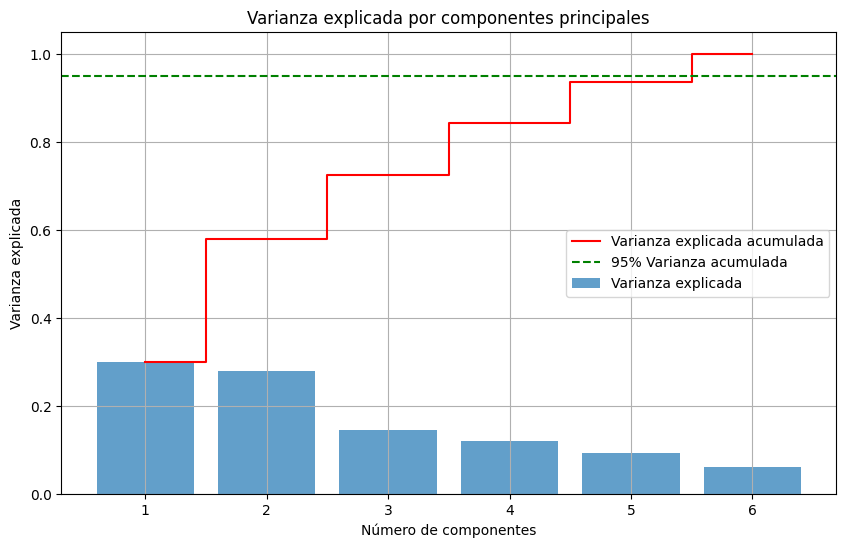

Varianza explicada para los dos primeros componentes: 0.58


In [29]:
# visualizar la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, label='Varianza explicada')
plt.step(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, where='mid', color='red', label='Varianza explicada acumulada')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Varianza acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por componentes principales')
plt.legend()
plt.grid(True)
plt.show()

# varianza explicada de los primeros 2 componentes
print(f"Varianza explicada para los dos primeros componentes: {sum(varianza_explicada[:2]):.2f}")

In [30]:
# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
df_pca['Survived'] = y.reset_index(drop=True)
df_pca['Pclass'] = df_titanic3['Pclass'].reset_index(drop=True)

# componentes principales
print(pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2']))

       Pclass       Sex       Age     SibSp     Parch      Fare
PC1 -0.383365  0.398852 -0.039675  0.389721  0.477610  0.558910
PC2  0.555720  0.076123 -0.553824  0.412865  0.346717 -0.296629
